In [1]:
# Import dependencies:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import time

## Step 1 - Scraping

### NASA Mars News

In [2]:
#!which chromedriver

In [3]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# Visit NASA news URL:
url = "https://mars.nasa.gov/news/"
browser.visit(url)
browser.is_element_present_by_css("ul.item_list li.slide", wait_time=1)

True

<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="--vh:649px;" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5f2dd495c68ab43b&amp;bkl=0&amp;bl=1&amp;pdt=191&amp;sid=5f2dd495c68ab43b&amp;pub=ra-5a690e4c1320e328&amp;rev=v8.28.7-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=mars.nasa.gov&amp;fp=news%2F&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;mk=Mars%2Cmissions%2CNASA%2Crover%2CCuriosity%2COpportunity%2CInSight%2CMars%20Reconnaissance%20Orbiter%2Cfacts&amp;colc=1596839061589&amp;jsl=1&amp;skipb=1&amp;callback=addthis.cbs.jsonp__62319813626056810" type="text/javascript">
  </script>
  <script s
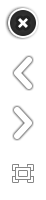
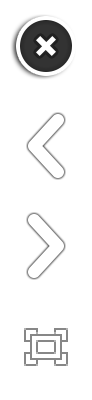
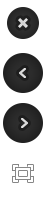
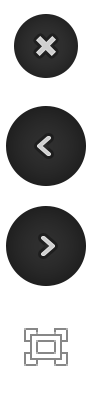
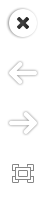
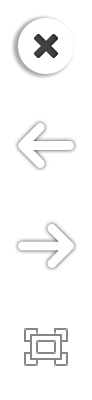
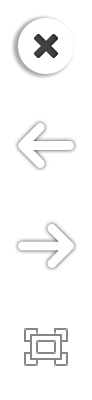

In [5]:
# Scrape page into soup and print 
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

In [6]:
# Save the most recent article and title:
news_title = soup.find_all("div", class_="content_title")[1].a.text
recent_news = soup.find("div", class_="article_teaser_body").text

print("Recent News:\n--------------------\n" + news_title)
print("\n" +recent_news)

Recent News:
--------------------
NASA's MAVEN Observes Martian Night Sky Pulsing in Ultraviolet Light

Vast areas of the Martian night sky pulse in ultraviolet light, according to images from NASA’s MAVEN spacecraft. The results are being used to illuminate complex circulation patterns in the Martian atmosphere.


### JPL Mars Space Images - Featured Image


In [7]:
# Visit the JPL Mars URL:

url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
response = browser.visit(url)

# Click button to have access the image
button = browser.find_by_id('full_image')
button.click()

In [8]:
# Scrape page into soup and print it:

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit- fancybox-margin fancybox-lock" style="">
 <!-- START HEADER: "DEFAULT" -->
 <!-- Google Tag Manager -->
 <head>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5f2dd4a7a09cf656&amp;bkl=0&amp;bl=1&amp;pdt=2949&amp;sid=5f2dd4a7a09cf656&amp;pub=&amp;rev=v8.28.7-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=

In [9]:
# Save the image url for the current Featured Mars:
image_url = soup.find('a', class_='fancybox').get('data-fancybox-href').strip()
#("img", class_="fancybox-img")["src"]
featured_image_url = "https://jpl.nasa.gov"+image_url

print(featured_image_url)


https://jpl.nasa.gov/spaceimages/images/mediumsize/PIA17356_ip.jpg


### Mars Weather

In [10]:
# Visit the Mars Weather twitter URL
url = "https://twitter.com/marswxreport?lang=en"
response = browser.visit(url)

In [11]:
# Scrape page into soup and print it:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<html dir="ltr" lang="en" style="font-size: 15px;">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/>
  <link href="//abs.twimg.com" rel="preconnect"/>
  <link href="//api.twitter.com" rel="preconnect"/>
  <link href="//pbs.twimg.com" rel="preconnect"/>
  <link href="//t.co" rel="preconnect"/>
  <link href="//video.twimg.com" rel="preconnect"/>
  <link href="//abs.twimg.com" rel="dns-prefetch"/>
  <link href="//api.twitter.com" rel="dns-prefetch"/>
  <link href="//pbs.twimg.com" rel="dns-prefetch"/>
  <link href="//t.co" rel="dns-prefetch"/>
  <link href="//video.twimg.com" rel="dns-prefetch"/>
  <link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/web/polyfills.1c57c6c5.js" nonce="" rel="preload"/>
  <link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/web/vendors~main.cd037d05.js" nonce="" rel="preload"/>
  <link as=

In [19]:
# Print the Mars Weather report using soup
mars_weather_all = soup.find_all('span')

for i in range (len(mars_weather_all)):
    if ("Insight" in mars_weather_all[i].text):
        mars_weather = mars_weather_all[i].text
        break
    
        
print(mars_weather_all)      

[<span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">Don’t miss what’s happening</span>, <span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">People on Twitter are the first to know.</span>, <span class="css-901oao css-16my406 css-bfa6kz r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0"><span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">Log in</span></span>, <span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">Log in</span>, <span class="css-901oao css-16my406 css-bfa6kz r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0"><span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">Sign up</span></span>, <span class="css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0">Sign up</span>, <span class="css-901oao css-16my406 css-bfa6kz r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0"></span>, <span class="css-901oao css-16my406 css-bfa6kz r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0"></span>, <span class="css-901oao css-16my406 

### Mars Facts

In [20]:
# Visit Mars Facts URL
url = "https://space-facts.com/mars/"
# save table
tables = pd.read_html(url)
df = tables[0]
df.columns = ["Parameter", "Volume"]
df

Parameter                         Volume
0  Equatorial Diameter:                       6,792 km
1       Polar Diameter:                       6,752 km
2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
3                Moons:            2 (Phobos & Deimos)
4       Orbit Distance:       227,943,824 km (1.38 AU)
5         Orbit Period:           687 days (1.9 years)
6  Surface Temperature:                   -87 to -5 °C
7         First Record:              2nd millennium BC
8          Recorded By:           Egyptian astronomers

In [21]:
# Convert dataframe to html file using pandas
html_table = df.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Parameter</th>\n      <th>Volume</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Surface Temperature:</td>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>First Record:</td>\n      <td>2nd millennium B

### Mars Hemispheres

In [25]:
# Visit the Mars Weather twitter URL
url = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&kl=target&vl=Mars"
response = browser.visit(url)


<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="#fff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0,
                                 maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <title>
   astrogeology.usgs.gov
  </title>
  <style>
   /* Copyright 2017 The Chromium Authors. All rights reserved.
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: var(--link-color);
}

body {
  --background-color: #fff;
  --error-code-color: var(--google-gray-700);
  --google-blue-100: rgb(210, 227, 252);
  --google-blue-300: rgb(138, 180, 248);
  --google-blue-600: rgb(26, 115, 232);
  --google-blue-700: rgb(25, 103, 210);
  --google-gray-100: rgb(241, 243, 244);
  --google-gray-300: rgb(218, 220, 224);
  --google-gray-500: rgb(154, 160, 166);
  --google-gray-50: rgb(248, 249, 250);
  --google-gray-600: rgb(128, 134, 139);
  --google-gray-700: rgb(95, 99, 104);
  
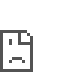
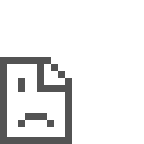
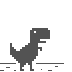
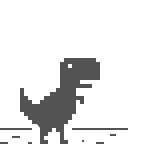
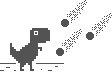
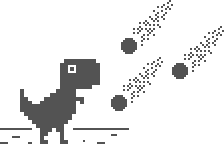
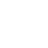
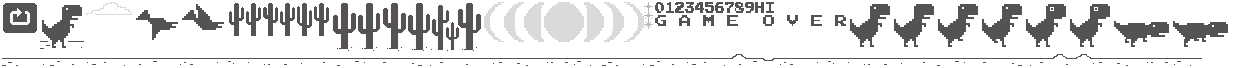
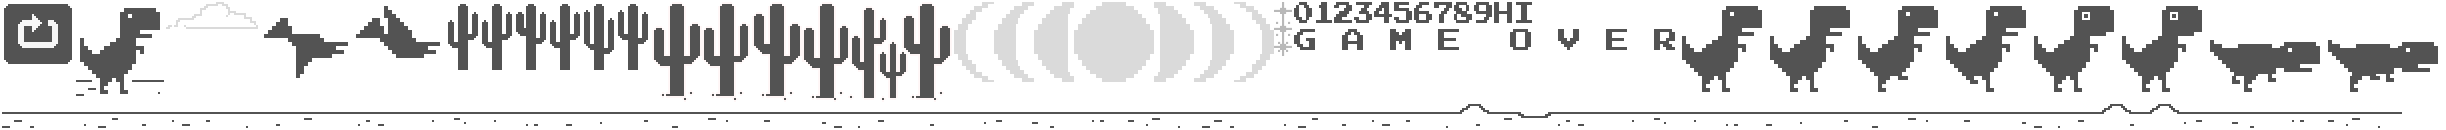

In [26]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

In [27]:
mars_hemisphere = []


for i in range (4):
    time.sleep(5)
    images = browser.find_by_tag('h3')
    images[i].click()
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    partial_url = soup.find("img", class_="wide_image")["src"]
    img_title = soup.find("h2", class_="title").text
    img_url = 'https://astrogeology.usgs.gov'+ partial_url
    dictionary={"title": img_title, "img_url":img_url}
    mars_hemisphere.append(dictionary)
    browser.back()
    

ElementDoesNotExist: no elements could be found with tag_name "h3"